In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import skimage.transform
!pip install imutils
import imutils
import math
import numpy as np
import random
import scipy
from PIL import ImageOps
import matplotlib.pyplot as plt

In [ ]:
# we are going to use only 16 images to show data augmentation
images_path = "/content/drive/MyDrive/Colab Notebooks/NNFL_research_paper/augmented_images"

In [ ]:
augmentation_data = []

for img in os.listdir(images_path):
  x = cv2.imread(os.path.join(images_path,img),cv2.IMREAD_COLOR) # read the image
  l = [None]*7
  l[0] = x
  augmentation_data.append(l)

# we are taking 16 images to show the data augmentation process

16
(424, 424, 3)


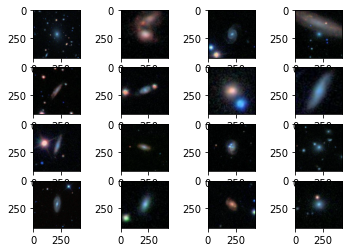

             ORIGINAL IMAGES


In [ ]:
# showing size and shape of the images in the pre-processed dataset
print(len(augmentation_data))
print(augmentation_data[0][0].shape)

cols = 4
rows = 4
for k in range(0, rows):
  for j in range(0, cols):
    plt.subplot(rows,cols,k*cols+j+1)
    plt.imshow(augmentation_data[k*cols+j][0].astype('uint8'))
  # show the plot
plt.show()
print("             ORIGINAL IMAGES")

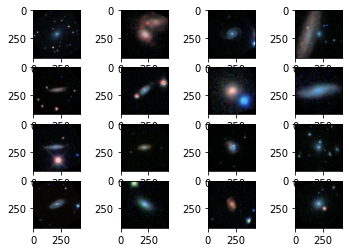

             ROTATED IMAGES


In [ ]:
# rotate image
for i in range(len(augmentation_data)):
  augmentation_data[i][1] = imutils.rotate(augmentation_data[i][0], random.uniform(0, 360))

cols = 4
rows = 4
for k in range(0, rows):
  for j in range(0, cols):
    plt.subplot(rows,cols,k*cols+j+1)
    plt.imshow(augmentation_data[k*cols+j][1].astype('uint8'))
  # show the plot
plt.show()
print("             ROTATED IMAGES")

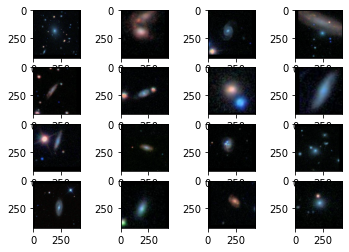

             TRANSLATED IMAGES


In [ ]:
#translate image
# in the research paper it is mentioned to shift the images upto 4 pixels so there will not be any visible change in the augmented images
for i in range(len(augmentation_data)):
  augmentation_data[i][2] = scipy.ndimage.shift(augmentation_data[i][0], [random.randint(-40, 40), random.randint(-40, 40), 0])

cols = 4
rows = 4
for k in range(0, rows):
  for j in range(0, cols):
    plt.subplot(rows,cols,k*cols+j+1)
    plt.imshow(augmentation_data[k*cols+j][2].astype('uint8'))
  # show the plot
plt.show()

print("             TRANSLATED IMAGES")

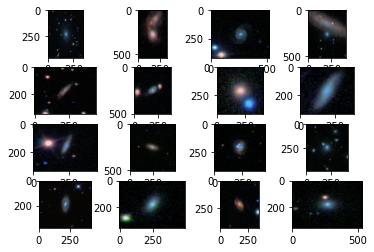

             SCALED IMAGES


In [ ]:
# image rescaling
scale_min = math.log(1/1.3)
scale_max = math.log(1.3)

for i in range(len(augmentation_data)):
  augmentation_data[i][3] = cv2.resize(augmentation_data[i][0] ,None ,fx=math.exp(random.uniform(scale_min, scale_max)), fy=math.exp(random.uniform(scale_min, scale_max)))

cols = 4
rows = 4
for k in range(0, rows):
  for j in range(0, cols):
    plt.subplot(rows,cols,k*cols+j+1)
    plt.imshow(augmentation_data[k*cols+j][3].astype('uint8'))
  # show the plot
plt.show()
print("             SCALED IMAGES")

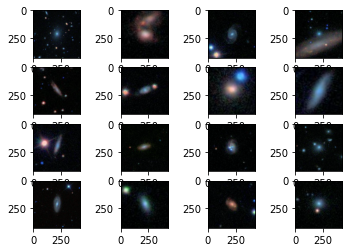

          VERTICALLY FLIPPED IMAGES


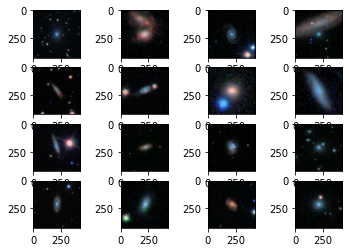

          HORIZONTALLY FLIPPED IMAGES


In [ ]:
#horizontally and veritcally flip the image
for i in range(len(augmentation_data)):
  x = random.uniform(0, 1)
  if(x>0.5):
    augmentation_data[i][4] = cv2.flip(augmentation_data[i][0], 0)
  else:
    augmentation_data[i][4] = augmentation_data[i][0]

  x = random.uniform(0, 1)
  if(x>0.5):
    augmentation_data[i][5] = cv2.flip(augmentation_data[i][0], 1)
  else:
    augmentation_data[i][5] = augmentation_data[i][0]

cols = 4
rows = 4
for k in range(0, rows):
  for j in range(0, cols):
    plt.subplot(rows,cols,k*cols+j+1)
    plt.imshow(augmentation_data[k*cols+j][4].astype('uint8'))
  # show the plot
plt.show()
print("          VERTICALLY FLIPPED IMAGES")

for k in range(0, rows):
  for j in range(0, cols):
    plt.subplot(rows,cols,k*cols+j+1)
    plt.imshow(augmentation_data[k*cols+j][5].astype('uint8'))
  # show the plot
plt.show()
print("          HORIZONTALLY FLIPPED IMAGES")

In [ ]:
# function for brightness adjustment
# hsv = (hue, saturation, lightness)
# by adjusting the s value (saturation) and v value (lightness) we are changing the brighness of an image
def brightness_adjust(img, low, high):
  # value is a random number between low and high
  # this value is then used for random brightness adjustment
  value = random.uniform(low, high)
  # converting the image to hsv format
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  hsv = np.array(hsv, dtype = np.float64)
  # changing saturation
  hsv[:,:,1] = hsv[:,:,1]*value
  hsv[:,:,1][hsv[:,:,1]>255]  = 255
  # changing lightness
  hsv[:,:,2] = hsv[:,:,2]*value 
  hsv[:,:,2][hsv[:,:,2]>255]  = 255
  # converting back to uint8 format
  hsv = np.array(hsv, dtype = np.uint8)
  img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
  return img

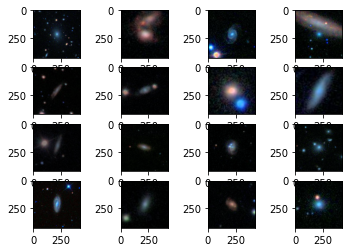

          BRIGHNESS ADJUSTED IMAGES


In [ ]:
# low = 0.5 and high = 1.5 as parameters of brightness_adjust function
# image brightness adjustment
for i in range(len(augmentation_data)):
  augmentation_data[i][6] = brightness_adjust(augmentation_data[i][0],0.5,1.5)

cols = 4
rows = 4
for k in range(0, rows):
  for j in range(0, cols):
    plt.subplot(rows,cols,k*cols+j+1)
    plt.imshow(augmentation_data[k*cols+j][6].astype('uint8'))
  # show the plot
plt.show()
print("          BRIGHNESS ADJUSTED IMAGES")

In [ ]:
for i in range(len(augmentation_data)):
  fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 20))
  for j in range(7):
    axes[j].imshow(augmentation_data[i][j].astype('uint8'))
  
  plt.show()

Output hidden; open in https://colab.research.google.com to view.